# IDENTITAS
Nama : Hasan Nur Wakhid        
NIM : A11.2021.13853            
Kelp : A11.4404           

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

In [2]:
# Membaca dataset
data = pd.read_csv("heart.csv")

In [3]:
# Menampilkan 5 data teratas
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Mengecek apakah ada atribut yang missing value
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
# Filter data hanya untuk individu dengan HeartDisease = 1
heart_disease_data = data[data["HeartDisease"] == 1]

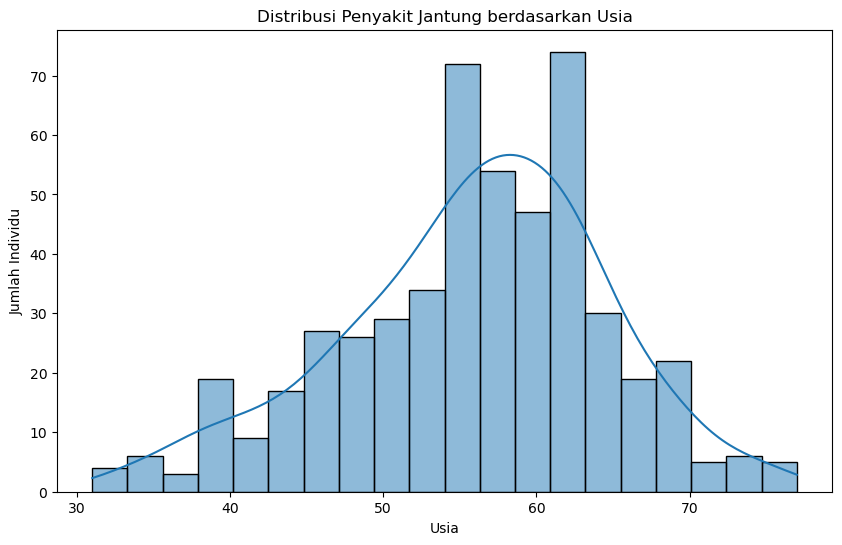

In [6]:
# Menampilkan grafik jumlah individu dengan penyakit jantung berdasarkan kelompok usia
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_disease_data, x="Age", bins=20, kde=True)
plt.title("Distribusi Penyakit Jantung berdasarkan Usia")
plt.xlabel("Usia")
plt.ylabel("Jumlah Individu")
plt.show()

dari grafik di atas dapat kita lihat paling banyak terkena penyakit jantung pada usia 50-70an

In [7]:
# Memisahkan fitur dan label
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

In [8]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

In [9]:
# Inisialisasi OneHotEncoder untuk variabel kategorikal
encoder = OneHotEncoder(drop='first')

In [10]:
# Menentukan kolom-kolom yang akan dilakukan normalisasi dan encoding
numerical_features = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [11]:
# Membuat transformer untuk normalisasi dan encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', encoder, categorical_features)])

In [12]:
# Normalisasi dan encoding pada fitur-fitur
X = preprocessor.fit_transform(X)

In [13]:
print(X)

[[0.24489796 0.7        0.47927032 ... 0.         0.         1.        ]
 [0.42857143 0.8        0.29850746 ... 0.         1.         0.        ]
 [0.18367347 0.65       0.46932007 ... 0.         0.         1.        ]
 ...
 [0.59183673 0.65       0.2172471  ... 1.         1.         0.        ]
 [0.59183673 0.65       0.39137645 ... 0.         1.         0.        ]
 [0.20408163 0.69       0.29021559 ... 0.         0.         1.        ]]


In [14]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DENGAN DECISION TREE

In [15]:
# Membuat model Decision Tree
model_dcs = DecisionTreeClassifier()

In [16]:
# Melatih model
model_dcs.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Memprediksi label untuk data uji
y_pred = model_dcs.predict(X_test)

In [18]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

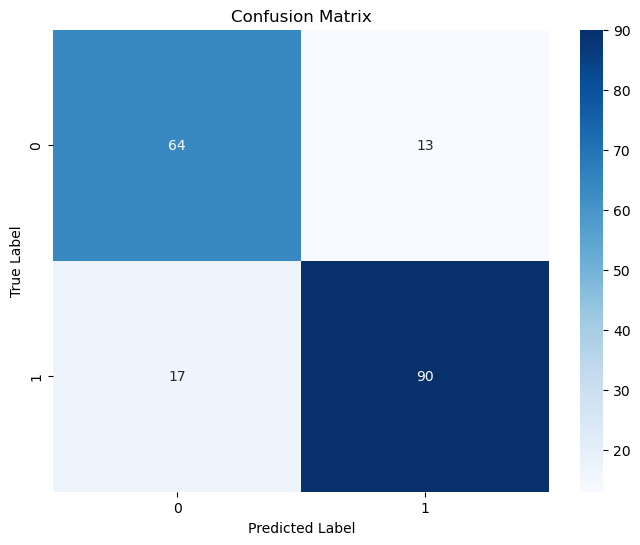

In [19]:
# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
# Membuat classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        77
           1       0.87      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



In [21]:
import pickle
pickle.dump(model_dcs, open('model.pkl', 'wb'))

# DENGAN NAIVE BAYES

In [22]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = model_nb.predict(X_test)

In [24]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

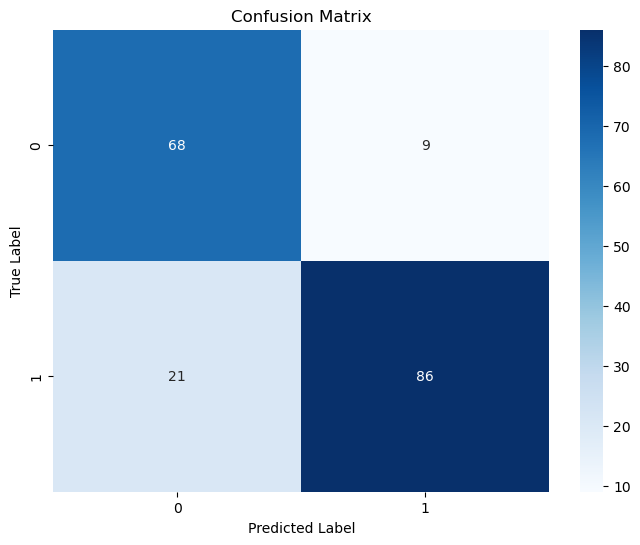

In [25]:
# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
# Membuat classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        77
           1       0.91      0.80      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



# DENGAN KNN

In [27]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = model_knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

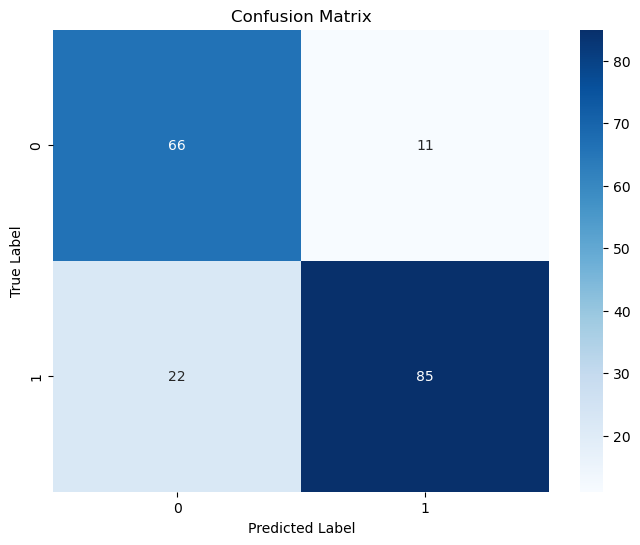

In [30]:
# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
# Membuat classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        77
           1       0.89      0.79      0.84       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



# MEMPREDIKSI IMPUTAN BARU DENGAN DECISION TREE

In [ ]:
# Memisahkan fitur dan label
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

In [ ]:
# Inisialisasi MinMaxScaler untuk fitur-fitur numerik
scaler = MinMaxScaler()

In [ ]:
# Inisialisasi OneHotEncoder untuk variabel kategorikal
encoder = OneHotEncoder(drop='first')

In [ ]:
# Menentukan kolom-kolom yang akan dilakukan normalisasi dan encoding
numerical_features = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
# Membuat transformer untuk normalisasi dan encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', encoder, categorical_features)])

In [ ]:
# Normalisasi dan encoding pada fitur-fitur
X = preprocessor.fit_transform(X)

In [ ]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier()
model.fit(X, y)

In [ ]:
Age = input("Masukkan usia: ")
Sex = input("Masukkan jenis kelamin (M: Male, F: Female): ")
ChestPainType = input("Masukkan jenis nyeri dada (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic): ")
RestingBP = float(input("Masukkan tekanan darah saat istirahat: "))
Cholesterol = float(input("Masukkan kolesterol: "))
FastingBS = int(input("Masukkan gula darah saat berpuasa (1: if FastingBS > 120 mg/dl, 0: otherwise): "))
RestingECG = input("Masukkan elektrokardiografi istirahat (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria): ")
MaxHR = float(input("Masukkan denyut jantung maksimal: "))
ExerciseAngina = input("Masukkan angina yang disebabkan oleh aktivitas (Y: Yes, N: No): ")
Oldpeak = float(input("Masukkan ST depression yang diinduksi oleh olahraga relatif terhadap istirahat: "))
ST_Slope = input("Masukkan slope segmen ST (Up: upsloping, Flat: flat, Down: downsloping): ")

In [ ]:
# Contoh input atribut yang ingin diprediksi
input_attributes = {
    'Age': Age,
    'Sex': Sex,
    'ChestPainType': ChestPainType,
    'RestingBP': RestingBP,
    'Cholesterol': Cholesterol,
    'FastingBS': FastingBS,
    'RestingECG': RestingECG,
    'MaxHR': MaxHR,
    'ExerciseAngina': ExerciseAngina,
    'Oldpeak': Oldpeak,
    'ST_Slope': ST_Slope
}

In [ ]:
# Mengubah input menjadi bentuk DataFrame
input_df = pd.DataFrame([input_attributes])

In [ ]:
print(input_df)

In [ ]:
# Melakukan normalisasi dan encoding pada input
input_df = preprocessor.transform(input_df)

In [ ]:
print(input_df)

In [ ]:
prediction = model.predict(input_df)

In [ ]:
# Menghasilkan hasil prediksi
if prediction[0] == 1:
    result = "Memiliki penyakit jantung"
else:
    result = "Tidak memiliki penyakit jantung"

print("Hasil Prediksi:", result)

hal pertama yang saya lakukan adalah mengimport pustaka Python yang sekiranya dibutuhkan. Dataset saya dalam bentuk csv sehingga saya menggunakan read_csv dalam mengimpornya. Kemudian saya menampilkan 5 data teratas dari datataset tersebut menggunakan head() serta mengeceknya apakah ada missing value pada dataset dengan menggunakan isnull().sum() dan ternyata dataset tidak ada yang missing value. Saya ingin memvisualisasikan dari dataset tersebut yakni dengan menampilkan grafik jumlah individu dengan penyakit jantung berdasarkan kelompok usia, dari grafik di atas dapat kita lihat paling banyak terkena penyakit jantung pada usia 50-70an.

Selanjutnya untuk klasifikasi saya memisahkan terlebih dahulu fitur dan labelnya, fitur saya masukkan ke variabel X dan label ke y. Kemudian saya juga menentukan kolom-kolom yang akan dilakukan normalisasi dan encoding serta memisahkan data menjadi data latih dan data uji dengan data uji sebesar 0.2 dan data latih sisanya. Untuk melihat hasil klasifikasi saya menampilkannya dengan confussion matrix dalam bentuk heatmap dan classification report.

Dari hal yang telah saya lakukan di atas dapat kita ketahui dari dataset paling banyak menderita penyakit jantung adalah umur 50-70 tahun. Setelah itu saya klasifikasikan menggunakan metode Decision Tree dan saya tampilkan laporan klasifikasinya, dari laporan itu menunjukkan klasifikasinya dengan tingkat akurasi mencapai sekitar 80%. Dengan menggunakan metode Decision Tree juga saya prediksi terhadap inputan baru dengan atribut-atribut yang diinputkan apakah menderita penyakit jantung atau tidak.